In [1]:
%matplotlib inline

!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Initial state of qubit 0:


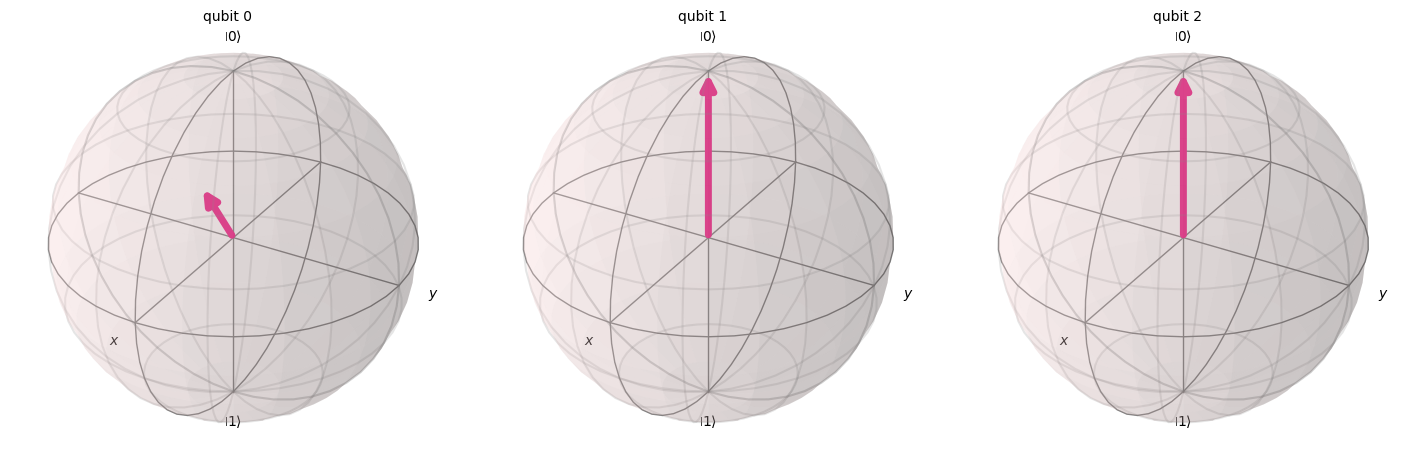

Fidelity between initial and teleported states: 1.000000

Bob’s final qubit (qubit 2) Bloch vector:


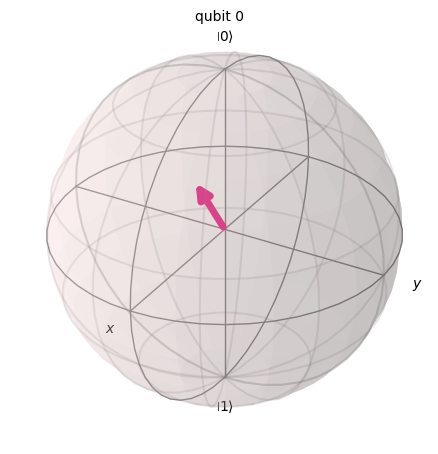

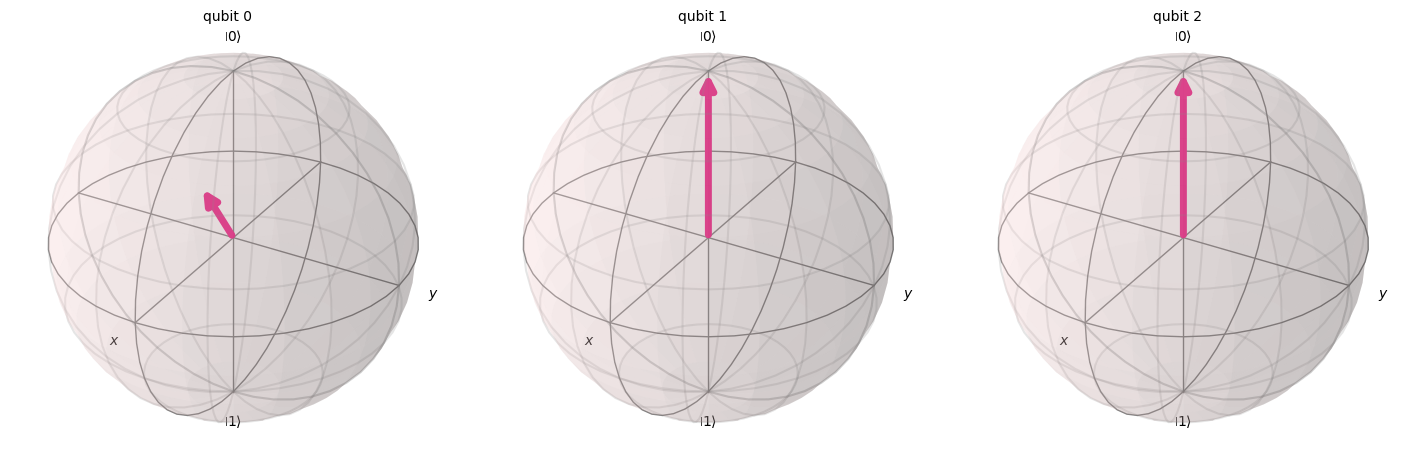

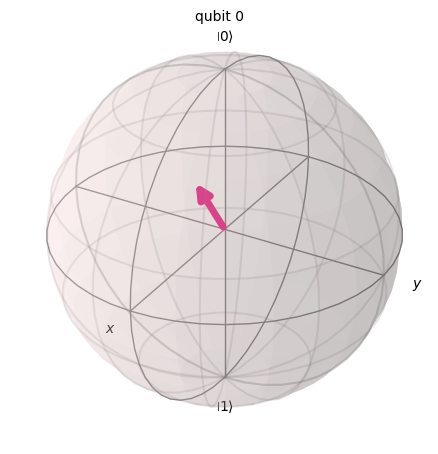

In [2]:
# Quantum Teleportation (Coherent version) – Qiskit 2.x compatible
# Works on modern qiskit-aer simulators

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Build the teleportation circuit
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)

# Save initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

# Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement part (but coherent)
qc.cx(0, 1)
qc.h(0)

# Coherent corrections
qc.cx(1, 2)
qc.cz(0, 2)

# Save final statevector explicitly (Qiskit 2.x requires this)
qc.save_statevector()

# 2️⃣ Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()

# Retrieve the saved statevector
sv_final = result.data(0)["statevector"]
sv_final = Statevector(sv_final)

# 3️⃣ Compare: initial vs Bob’s (qubit 2) final state
rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

# Extract the dominant pure states (since both should be pure)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

# Compute fidelity
fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"Fidelity between initial and teleported states: {fidelity:.6f}")

# 4️⃣ Visualize Bloch spheres (fixed)
print("\nBob’s final qubit (qubit 2) Bloch vector:")

# Convert rho_bob (DensityMatrix) → pure statevector (dominant eigenvector)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]  # dominant eigenvector
bob_sv = Statevector(bob_state)

display(plot_bloch_multivector(bob_sv))

In [3]:
# Task_1 : Custom State Teleportation

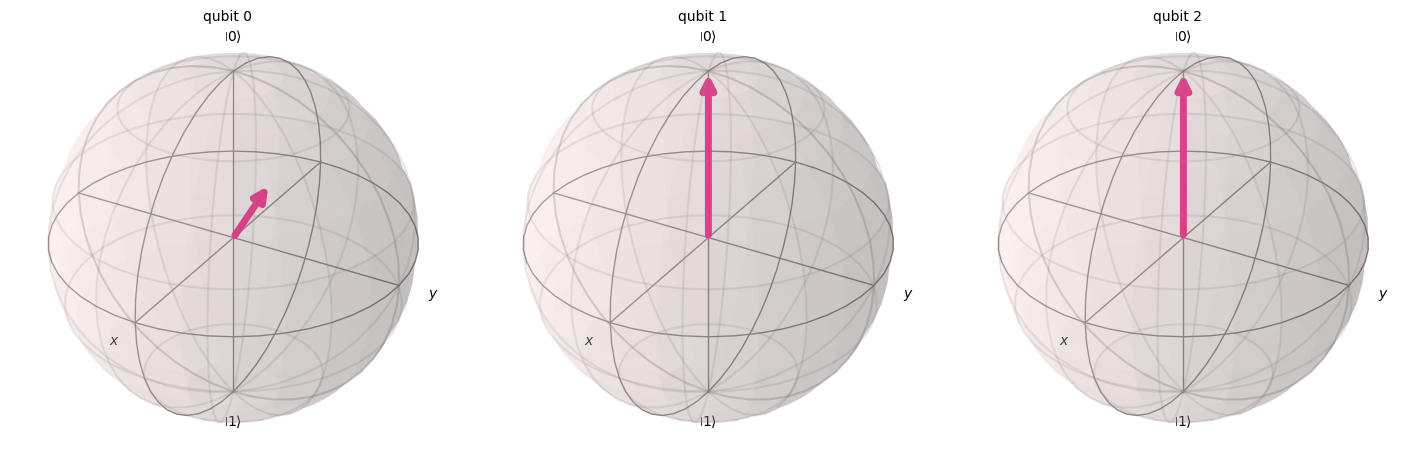

In [4]:
#  π/4
theta = np.pi / 4
phi = np.pi / 4

qc = QuantumCircuit(3)
qc.ry(theta, 0)
qc.rz(phi, 0)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)
plt.show()

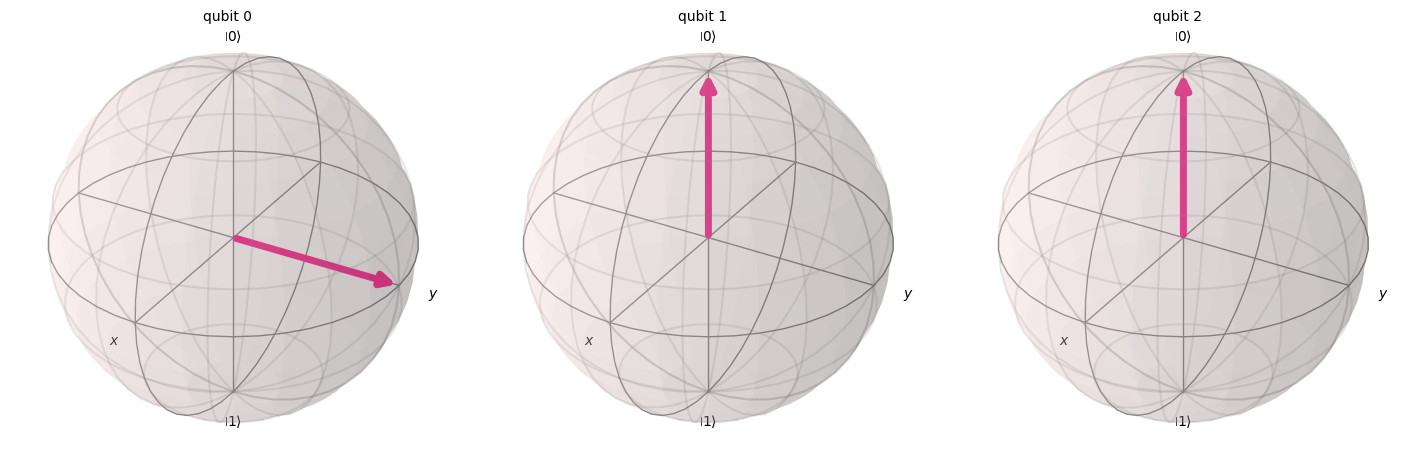

In [5]:
#  π/2
theta = np.pi / 2
phi = np.pi / 2

qc = QuantumCircuit(3)
qc.ry(theta, 0)
qc.rz(phi, 0)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)
plt.show()

In [6]:
'''
Changing θ and φ changes the position of the state vector on the Bloch sphere — θ controls latitude, φ controls longitude.
'''

'\nChanging θ and φ changes the position of the state vector on the Bloch sphere — θ controls latitude, φ controls longitude.\n'

In [7]:
# Task_2: Add Classical Measurement

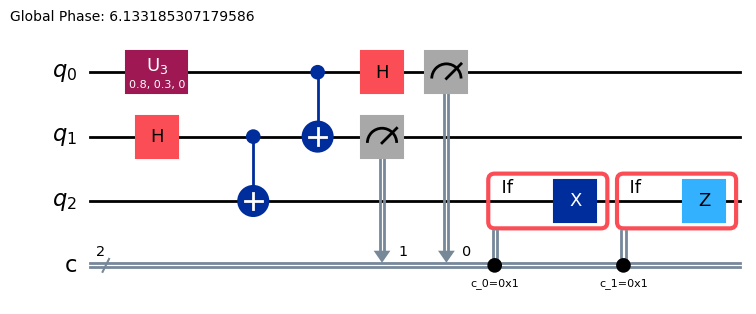

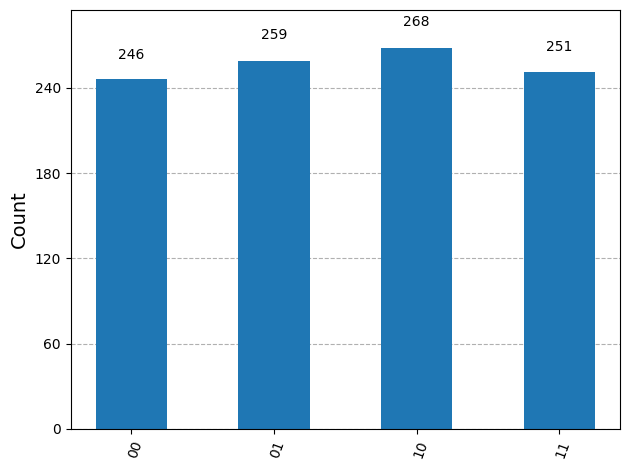

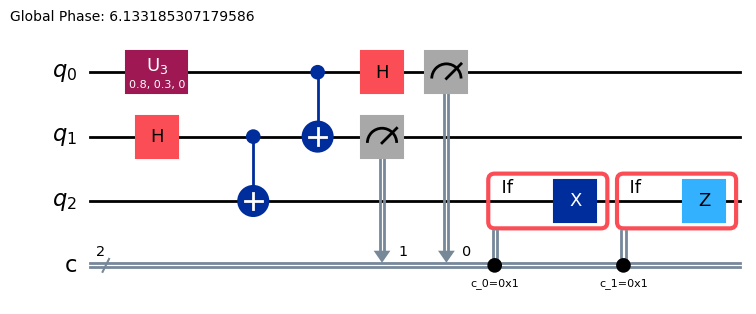

In [21]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np

qc = QuantumCircuit(3, 2)

theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)

qc.h(1)
qc.cx(1, 2)

qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])   # here, qubits 0 and 1 measurements are included

with qc.if_test((qc.clbits[0], 1)):  # if classical bit 0 == 1
    qc.x(2)  # conditional correction: apply X based on measurement

with qc.if_test((qc.clbits[1], 1)):  # if classical bit 1 == 1
    qc.z(2)  # conditional correction: apply Z based on measurement

sim = Aer.get_backend('aer_simulator')
qc = transpile(qc, sim)
result = sim.run(qc).result()
counts = result.get_counts()

plot_histogram(counts)
qc.draw('mpl')


In [9]:
'''
Measurements on qubits 0 and 1 are added to obtain classical outcomes, and then conditional corrections (.c_if()) are applied to qubit 2 based on those results.
This completes the quantum teleportation protocol, ensuring the original quantum state is reconstructed on the receiver’s qubit.
'''

'\nMeasurements on qubits 0 and 1 are added to obtain classical outcomes, and then conditional corrections (.c_if()) are applied to qubit 2 based on those results.\nThis completes the quantum teleportation protocol, ensuring the original quantum state is reconstructed on the receiver’s qubit.\n'

In [10]:
# Task_3 : Fidelity Analysis

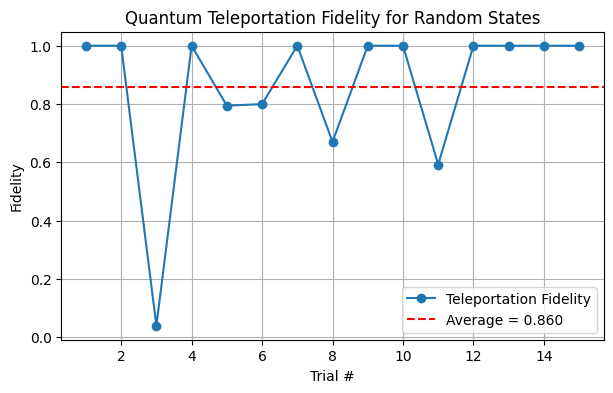

Average Teleportation Fidelity = 0.8597


In [11]:
from qiskit.quantum_info import Statevector, DensityMatrix, state_fidelity, partial_trace

def teleport_fidelity(theta, phi):
    """Run one teleportation experiment and return the fidelity."""
    qc = QuantumCircuit(3, 2)

    qc.ry(theta, 0)
    qc.rz(phi, 0)

    qc.h(1)
    qc.cx(1, 2)

    qc.cx(0, 1)
    qc.h(0)
    qc.measure([0, 1], [0, 1])

    with qc.if_test((qc.clbits[0], 1)):
        qc.x(2)
    with qc.if_test((qc.clbits[1], 1)):
        qc.z(2)
    qc.save_statevector()
    sim = Aer.get_backend('aer_simulator')
    qc = transpile(qc, sim)
    result = sim.run(qc, shots=1, memory=True).result()

    final_state = result.data(0)['statevector']

    # Extract teleported qubit (qubit 2)
    teleported = partial_trace(DensityMatrix(final_state), [0, 1])

    # Ideal original state
    qc_ref = QuantumCircuit(1)
    qc_ref.ry(theta, 0)
    qc_ref.rz(phi, 0)
    ideal = Statevector.from_instruction(qc_ref)


    # Return fidelity
    return state_fidelity(ideal, teleported)

# --- Run for multiple random (θ, φ) pairs ---
num_trials = 15
fidelities = []
for _ in range(num_trials):
    theta = np.random.uniform(0, np.pi)
    phi = np.random.uniform(0, 2*np.pi)
    fidelities.append(teleport_fidelity(theta, phi))

# --- Plot results ---
plt.figure(figsize=(7,4))
plt.plot(range(1, num_trials+1), fidelities, 'o-', label='Teleportation Fidelity')
plt.axhline(np.mean(fidelities), color='r', linestyle='--', label=f'Average = {np.mean(fidelities):.3f}')
plt.xlabel('Trial #')
plt.ylabel('Fidelity')
plt.title('Quantum Teleportation Fidelity for Random States')
plt.legend()
plt.grid(True)
plt.show()

print(f"Average Teleportation Fidelity = {np.mean(fidelities):.4f}")


In [12]:
'''
This code measures teleportation accuracy by comparing the teleported qubit’s statevector with the original for multiple random inputs, showing fidelity near 1 in ideal conditions.
'''

'\nThis code measures teleportation accuracy by comparing the teleported qubit’s statevector with the original for multiple random inputs, showing fidelity near 1 in ideal conditions.\n'

In [13]:
# Task_4 : Step-by-Step Visualization

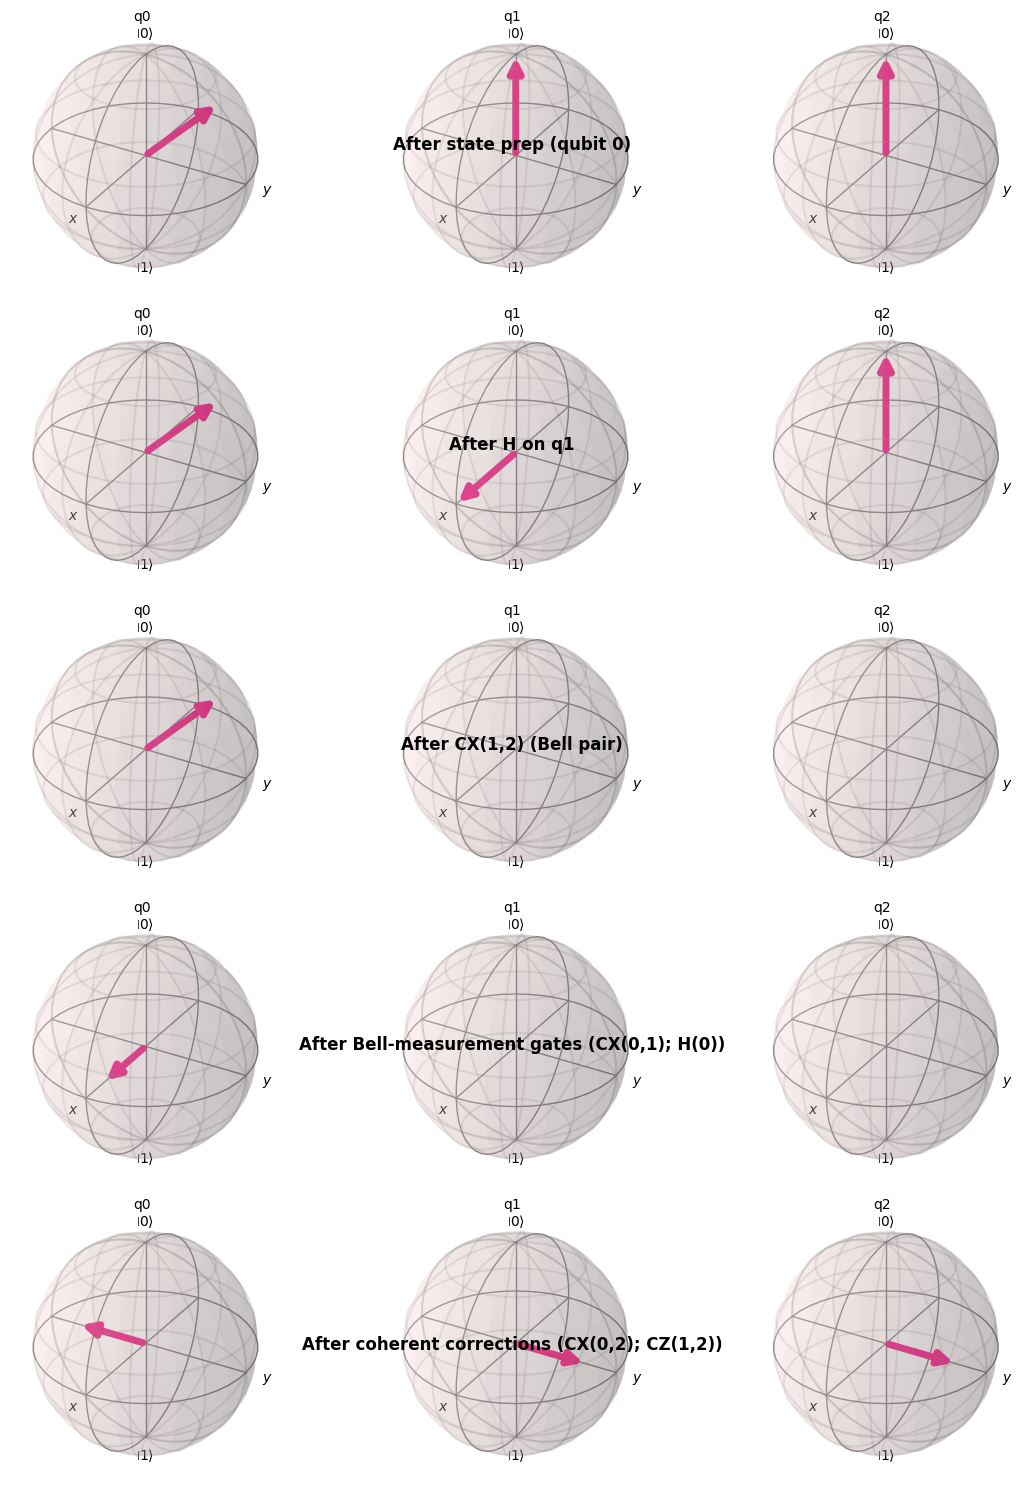

In [14]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import DensityMatrix, partial_trace
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt

pauli_x = np.array([[0, 1], [1, 0]], dtype=complex)
pauli_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
pauli_z = np.array([[1, 0], [0, -1]], dtype=complex)

def bloch_vector_from_density(rho):
    """Return Bloch vector [⟨X⟩, ⟨Y⟩, ⟨Z⟩] for single-qubit density matrix rho."""
    return np.array([
        np.real(np.trace(rho.data @ pauli_x)),
        np.real(np.trace(rho.data @ pauli_y)),
        np.real(np.trace(rho.data @ pauli_z))
    ])

def run_and_get_bloch_vectors(qc):
    """Save statevector, run, and return Bloch vectors for qubits [0,1,2]."""
    circ = qc.copy()
    circ.save_statevector()
    sim = Aer.get_backend("aer_simulator")
    circ = transpile(circ, sim)
    result = sim.run(circ).result()
    sv = result.data(0)["statevector"]
    dm = DensityMatrix(sv)
    bloch_vecs = []
    for qubit in [0, 1, 2]:
        reduced = partial_trace(dm, [q for q in range(3) if q != qubit])
        bloch_vecs.append(bloch_vector_from_density(reduced))
    return bloch_vecs

theta = np.pi/4
phi = np.pi/2

qc_a = QuantumCircuit(3)
qc_a.ry(theta, 0)
qc_a.rz(phi, 0)

qc_b = qc_a.copy()
qc_b.h(1)

qc_c = qc_b.copy()
qc_c.cx(1, 2)

qc_d = qc_c.copy()
qc_d.cx(0, 1)
qc_d.h(0)

qc_e = qc_d.copy()
qc_e.cx(0, 2)
qc_e.cz(1, 2)

steps = {
    "After state prep (qubit 0)": qc_a,
    "After H on q1": qc_b,
    "After CX(1,2) (Bell pair)": qc_c,
    "After Bell-measurement gates (CX(0,1); H(0))": qc_d,
    "After coherent corrections (CX(0,2); CZ(1,2))": qc_e
}

n_steps = len(steps)
fig = plt.figure(figsize=(12, 3 * n_steps))
plt_idx = 1
for title, qc in steps.items():
    bloch_vecs = run_and_get_bloch_vectors(qc)
    for q_idx, bv in enumerate(bloch_vecs):
        ax = fig.add_subplot(n_steps, 3, plt_idx, projection="3d")
        plot_bloch_vector(bv, title=f"q{q_idx}", ax=ax)
        plt_idx += 1
    fig.text(0.5, 1 - (list(steps.keys()).index(title) + 0.5) / n_steps, title,
             ha='center', va='center', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


In [15]:
'''
This code visualizes the teleportation process step-by-step by plotting Bloch spheres after each major gate to show how the qubit state moves through the circuit.
'''

'\nThis code visualizes the teleportation process step-by-step by plotting Bloch spheres after each major gate to show how the qubit state moves through the circuit.\n'

In [16]:
# Task_5 : Introduce Noise

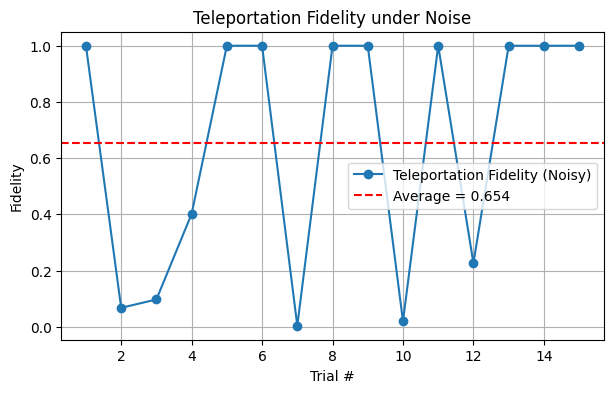

Average Teleportation Fidelity under Noise = 0.6544


In [17]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, amplitude_damping_error
from qiskit.quantum_info import Statevector, DensityMatrix, state_fidelity, partial_trace
import numpy as np
import matplotlib.pyplot as plt

def teleport_fidelity_with_noise(theta, phi, noise_model):
    qc = QuantumCircuit(3, 2)
    qc.ry(theta, 0)
    qc.rz(phi, 0)
    qc.h(1)
    qc.cx(1, 2)
    qc.cx(0, 1)
    qc.h(0)
    qc.measure([0, 1], [0, 1])

    with qc.if_test((qc.clbits[0], 1)):
        qc.x(2)
    with qc.if_test((qc.clbits[1], 1)):
        qc.z(2)

    sim = AerSimulator(noise_model=noise_model)
    qc.save_statevector()
    qc = transpile(qc, sim)
    result = sim.run(qc).result()
    final_state = result.data(0)['statevector']

    teleported = partial_trace(DensityMatrix(final_state), [0, 1])

    qc_ref = QuantumCircuit(1)
    qc_ref.ry(theta, 0)
    qc_ref.rz(phi, 0)
    ideal = Statevector.from_instruction(qc_ref)

    return state_fidelity(ideal, teleported)

# Noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.02, 1), ['u3', 'rx', 'ry', 'rz'])
noise_model.add_all_qubit_quantum_error(amplitude_damping_error(0.02), ['u3', 'rx', 'ry', 'rz'])

num_trials = 15
fidelities = []
for _ in range(num_trials):
    theta = np.random.uniform(0, np.pi)
    phi = np.random.uniform(0, 2*np.pi)
    fidelities.append(teleport_fidelity_with_noise(theta, phi, noise_model))

plt.figure(figsize=(7,4))
plt.plot(range(1, num_trials+1), fidelities, 'o-', label='Teleportation Fidelity (Noisy)')
plt.axhline(np.mean(fidelities), color='r', linestyle='--', label=f'Average = {np.mean(fidelities):.3f}')
plt.xlabel('Trial #')
plt.ylabel('Fidelity')
plt.title('Teleportation Fidelity under Noise')
plt.legend()
plt.grid(True)
plt.show()

print(f"Average Teleportation Fidelity under Noise = {np.mean(fidelities):.4f}")


In [18]:
'''
This code adds depolarizing and amplitude damping noise to the teleportation circuit to observe how noise reduces the average teleportation fidelity.
'''

'\nThis code adds depolarizing and amplitude damping noise to the teleportation circuit to observe how noise reduces the average teleportation fidelity.\n'